In [ ]:
import os
import sys

import zipfile
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/CATS_DOGS.zip"
zip_files = zipfile.ZipFile(file = path , mode = "r")
zip_files.extractall()
zip_files.close()

In [ ]:
path ="/content/CATS_DOGS"
for folder, subfolders,filenames in os.walk(path):
    print(folder,"******",subfolders,"******",filenames)

/content/CATS_DOGS ****** ['test', 'train'] ****** []
/content/CATS_DOGS/test ****** ['DOG', 'CAT'] ****** []
/content/CATS_DOGS/test/DOG ****** [] ****** ['11115.jpg', '10942.jpg', '10496.jpg', '12323.jpg', '12490.jpg', '9479.jpg', '11863.jpg', '10195.jpg', '10514.jpg', '12355.jpg', '11314.jpg', '9570.jpg', '12026.jpg', '10525.jpg', '10792.jpg', '9737.jpg', '11025.jpg', '11692.jpg', '11488.jpg', '12286.jpg', '11638.jpg', '10036.jpg', '10979.jpg', '10339.jpg', '11406.jpg', '12448.jpg', '9750.jpg', '9985.jpg', '12194.jpg', '10207.jpg', '10813.jpg', '10820.jpg', '11600.jpg', '11137.jpg', '11794.jpg', '12407.jpg', '11992.jpg', '10630.jpg', '9785.jpg', '9869.jpg', '9778.jpg', '9809.jpg', '10935.jpg', '12075.jpg', '10401.jpg', '11872.jpg', '9468.jpg', '12154.jpg', '11520.jpg', '11120.jpg', '10232.jpg', '11486.jpg', '11177.jpg', '9549.jpg', '12165.jpg', '11323.jpg', '11280.jpg', '11067.jpg', '9416.jpg', '10795.jpg', '9632.jpg', '12315.jpg', '12199.jpg', '10636.jpg', '11793.jpg', '10048.jpg',

In [ ]:
path = "/content/CATS_DOGS/"
img_names = []

for folder, subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+"/"+img)

In [ ]:
len(img_names)

24994

In [ ]:
img_sizes = []
rejected = []

for item in img_names :
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)

    except:

        rejected.append(item)

In [ ]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [ ]:
df = pd.DataFrame(img_sizes)
df.columns = ["Width", "Height"]
df.head()

,Width,Height
0,500,375
1,375,375
2,400,402
3,223,292
4,500,374


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Width,24994.0,404.493518,108.941802,42.0,323.0,448.0,500.0,500.0
Height,24994.0,361.037129,96.936811,33.0,302.0,375.0,421.0,500.0


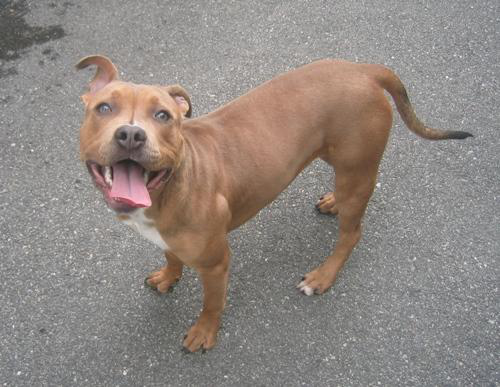

In [ ]:
dog = Image.open("/content/CATS_DOGS/train/DOG/14.jpg")
display(dog)

In [ ]:
dog.size

(500, 387)

In [ ]:
np.array(dog).max(),np.array(dog).min()

(255, 21)

In [ ]:
dog.getpixel((0,0))

(90, 95, 98)

In [ ]:
transform = transforms.Compose([
            transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


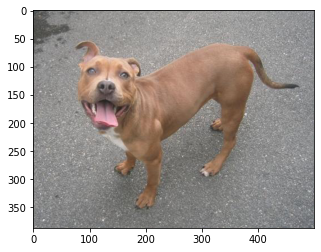

In [ ]:
# (Height, Width, Channel) # np.transpose(im,(1,2,0))

show = np.transpose(im.numpy(), (1,2,0))
plt.imshow(show)
plt.show()

In [ ]:
np.array(im).max(),np.array(im).min()

(1.0, 0.08235294)

In [ ]:
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

In [ ]:
# Normalize İşlemi !!!

np.array(dog.getpixel((0,0)) ) / 255

array([0.35294118, 0.37254902, 0.38431373])

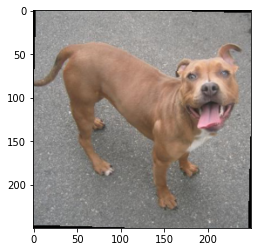

In [ ]:
transform = transforms.Compose([
            transforms.Resize(250),
            transforms.CenterCrop(250), # (250,250) olarak kesiyor merkezden !!!
            transforms.ToTensor(),
            transforms.RandomHorizontalFlip(p = 1),
            transforms.RandomRotation(30), # -30 yada +30 !!!

])

im = transform(dog)
show = np.transpose(im.numpy(), (1,2,0))
plt.imshow(show)
plt.show()

In [ ]:
im[0].mean(),im[1].mean(),im[2].mean(),"---",im[0].std(),im[1].std(),im[2].std()

(tensor(0.4612),
 tensor(0.3279),
 tensor(0.4509),
 '---',
 tensor(0.4461),
 tensor(0.4372),
 tensor(0.5058))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


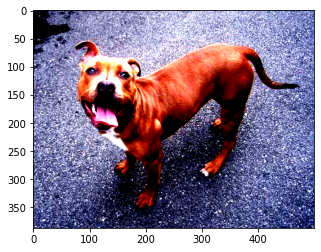

In [ ]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean = [0.458, 0.456, 0.406], std = [0.229,0.224,0.225])
                                ])

im = transform(dog)
show = np.transpose(im.numpy(), (1,2,0))
plt.imshow(show)
plt.show()

In [ ]:
im[0].mean(),im[1].mean(),im[2].mean(), "---",im[0].std(),im[1].std(),im[2].std()

(tensor(0.4612),
 tensor(0.3279),
 tensor(0.4509),
 '---',
 tensor(0.4461),
 tensor(0.4372),
 tensor(0.5058))

--

In [ ]:
train_transform = transforms.Compose([
                                      transforms.RandomRotation(10),
                                      transforms.RandomHorizontalFlip(p = .5),
                                      transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean = [0.458, 0.456, 0.406], std = [0.229,0.224,0.225] ) # output = (value - mean) / std

])

In [ ]:
test_transform = transforms.Compose([
                                      transforms.RandomRotation(10),
                                      transforms.RandomHorizontalFlip(p = .5),
                                      transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean = [0.458, 0.456, 0.406], std = [0.229,0.224,0.225] ) # output = (value - mean) / std
])

In [ ]:
path = "/content/CATS_DOGS"


train_data = datasets.ImageFolder(os.path.join(path, "train"), transform= train_transform)

test_data = datasets.ImageFolder(os.path.join(path, "test"), transform= test_transform)

torch.manual_seed(42)

train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size =10, shuffle=False)

In [ ]:
class_names = train_data.classes
class_names

['CAT', 'DOG']

In [ ]:
len(train_data), len(test_data)

(18743, 6251)

In [ ]:
for images, labels in train_loader:
    break

In [ ]:
images.shape, labels

(torch.Size([10, 3, 224, 224]), tensor([1, 1, 0, 0, 1, 1, 0, 1, 0, 0]))

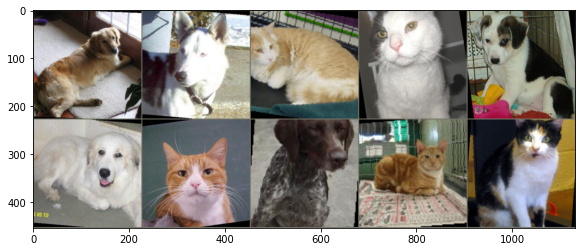

In [ ]:
im = make_grid(images, nrow = 5)

inv_normalize = transforms.Normalize(mean = [-0.458/0.229, -0.456/0.224, -0.406/0.225], std = [1 / 0.229,1 / 0.224,1 / 0.225]
)

im_inv = inv_normalize(im)

plt.figure(figsize = (12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1,2,0)))
plt.show()

In [ ]:
(((224-2)/2)-2) /2

54.5

In [ ]:
 class CNN(nn.Module):

    def __init__(self):

        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2)

    def forward(self ,X ):

        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim = 1)

In [ ]:
torch.manual_seed(101)

CNNmodel = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr = 0.001)

In [ ]:
CNNmodel

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [ ]:
for p in CNNmodel.parameters():
    print(p.numel())

162
6
864
16
5598720
120
10080
84
168
2


In [ ]:
len(train_loader),len(test_loader)

(1875, 626)

In [ ]:
import time

start_time = time.time()

epochs = 3

# Limits on num of batches

max_trn_batch = 800 
max_tst_batch = 300 

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

    trn_corr = 0
    tst_corr = 0

    for b, (X_train,y_train) in enumerate(train_loader):

        if b == max_trn_batch:
            break

        b+=1

        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr +=batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 200 == 0:
            print(f"Epoch : {i:3}, Loss : {loss.item():.4f}")

    train_losses.append(loss)
    train_correct.append(trn_corr)


    with torch.no_grad():
        for b,(X_test, y_test) in enumerate(test_loader):

            if b == max_tst_batch:
                break

            y_val = CNNmodel(X_test)

            predicted = torch.max(y_val, 1)[1]
            batch_corr = (predicted == y_test).sum()
            tst_corr = tst_corr + batch_corr

    loss = criterion(y_val,y_test)

    test_losses.append(loss)
    test_correct.append(tst_corr)


total_time = time.time() - start_time
print()
print(f"Total Time : {total_time / 60} Minutes")

Epoch :   0, Loss : 0.6181
Epoch :   0, Loss : 0.5688
Epoch :   0, Loss : 0.6335
Epoch :   0, Loss : 0.4884
Epoch :   1, Loss : 0.6101
Epoch :   1, Loss : 0.7825
Epoch :   1, Loss : 0.3448
Epoch :   1, Loss : 0.5201
Epoch :   2, Loss : 0.3523
Epoch :   2, Loss : 0.3832
Epoch :   2, Loss : 0.4275
Epoch :   2, Loss : 0.7298

Total Time : 13.829776390393574 Minutes


In [ ]:
torch.save(CNNmodel.state_dict(), "my3epochmodel.pt")

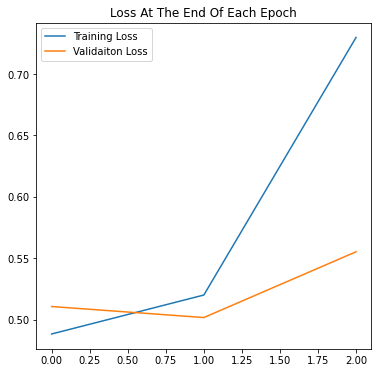

In [ ]:
plt.figure(figsize = (6,6))

plt.plot(train_losses, label = "Training Loss")
plt.plot(test_losses, label ="Validaiton Loss")
plt.title("Loss At The End Of Each Epoch")
plt.legend(loc = "best")
plt.show()

In [ ]:
len(train_loader), len(test_loader)

(1875, 626)

In [ ]:
X_train.shape,X_test.shape

(torch.Size([10, 3, 224, 224]), torch.Size([10, 3, 224, 224]))

In [ ]:
len(train_correct),len(test_correct)

(3, 3)

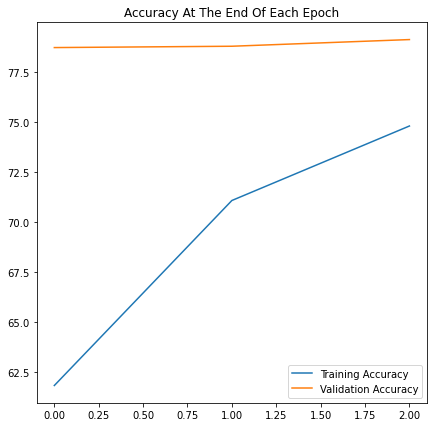

In [ ]:
plt.figure(figsize = (7,7))
plt.plot([t / 80 for t in train_correct], label = "Training Accuracy")
plt.plot([t / 30 for t in test_correct] , label = "Validation Accuracy")
plt.title("Accuracy At The End Of Each Epoch")
plt.legend(loc = "best")
plt.show()

In [ ]:
test_correct[-1].item() / 3000

0.7913333333333333

---

In [ ]:
from torchvision import models,datasets,transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

In [ ]:
AlexNetmodel = models.alexnet(pretrained = True)
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for param in AlexNetmodel.parameters():
    param.requires_grad = False

In [ ]:
torch.manual_seed(42)

AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024), 
                                        nn.ReLU(),
                                        nn.Dropout(0.5),
                                        nn.Linear(1024, 2),
                                        nn.LogSoftmax(dim=1))

AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, 

In [ ]:
for param in AlexNetmodel.parameters():
    print(param.numel())

23232
64
307200
192
663552
384
884736
256
589824
256
9437184
1024
2048
2


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.parameters(), lr = 0.001)

In [ ]:
import time

start_time = time.time()

epochs = 1

# Limits on num of batches

max_trn_batch = 800 # batch 100 images --- > 8000 images
max_tst_batch = 300 # 3000 max images

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

    trn_corr = 0
    tst_corr = 0

    for b, (X_train,y_train) in enumerate(train_loader):

        if b == max_trn_batch:
            break

        b+=1

        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr +=batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 200 == 0:
            print(f"Epoch : {i:3}, Batch : {b:4} [{10*b:6} / 8000], Loss : {loss.item():.4f}, Accuracy : {trn_corr.item()*100 / (10*b):7.3f}%")

    train_losses.append(loss)
    train_correct.append(trn_corr)


    with torch.no_grad():
        for b,(X_test, y_test) in enumerate(test_loader):

            if b == max_tst_batch:
                break

            y_val = AlexNetmodel(X_test)

            predicted = torch.max(y_val, 1)[1]
            batch_corr = (predicted == y_test).sum()
            tst_corr = tst_corr + batch_corr

    loss = criterion(y_val,y_test)

    test_losses.append(loss)
    test_correct.append(tst_corr)


total_time = time.time() - start_time
print()
print(f"Total Time : {total_time / 60} Minutes")

Epoch :   0, Batch :  200 [  2000 / 8000], Loss : 0.4812, Accuracy :  88.250%
Epoch :   0, Batch :  400 [  4000 / 8000], Loss : 0.1647, Accuracy :  90.275%
Epoch :   0, Batch :  600 [  6000 / 8000], Loss : 0.2360, Accuracy :  91.217%
Epoch :   0, Batch :  800 [  8000 / 8000], Loss : 0.0342, Accuracy :  91.963%

Total Time : 8.165494819482168 Minutes


In [ ]:
print(test_correct[-1].item() / 3000)

0.9243333333333333


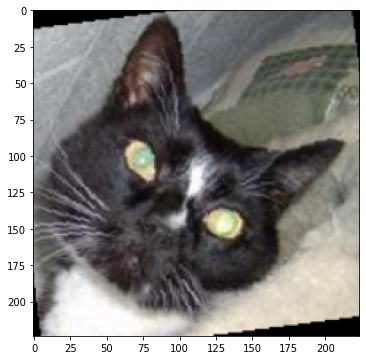

In [ ]:
image_index = 2022

im = inv_normalize(test_data[image_index][0])

plt.figure(figsize = (6,6))
plt.imshow(np.transpose(im, (1,2,0)))
plt.show()

In [ ]:
CNNmodel.eval()

with torch.no_grad():

    new_pred = CNNmodel(test_data[image_index][0].view(1,3,224,224)).argmax()

class_names[new_pred.item()]

'CAT'

In [ ]:
torch.max(new_pred), torch.argmax(new_pred)

(tensor(0), tensor(0))

In [ ]:
AlexNetmodel.eval()

with torch.no_grad():

    new_pred = AlexNetmodel(test_data[image_index][0].view(1,3,224,224)).argmax()

class_names[new_pred.item()]

'CAT'

In [ ]:
torch.max(new_pred), torch.argmax(new_pred)

(tensor(0), tensor(0))

In [ ]:
# torch max will return both, the 2nd value being the argmax. That is why we used [1]
# Refer to the 2nd part of the document here (torch.max with the dim input):